References:
    https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb#scrollTo=7FP5258xjs-v
    https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb

In [64]:
import tensorflow as tf
import numpy as np

In [65]:
mnist = tf.keras.datasets.mnist

In [66]:
mnist

<module 'tensorflow._api.v1.keras.datasets.mnist' from '/Users/chidanandapati/anaconda3/lib/python3.6/site-packages/tensorflow/_api/v1/keras/datasets/mnist/__init__.py'>

In [67]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [68]:
# scale the inputs to be in the range [0-1] rather than [0-255]
x_train, x_test = x_train / 255.0, x_test / 255.0

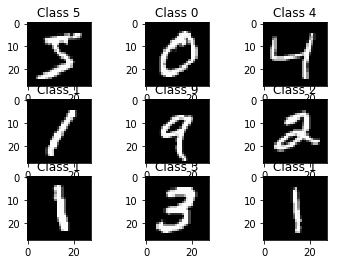

In [69]:
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [70]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 14s 236us/step - loss: 0.2000 - acc: 0.9414
Epoch 2/5
60000/60000 [==============================] - 14s 236us/step - loss: 0.0801 - acc: 0.9754
Epoch 3/5
60000/60000 [==============================] - 14s 234us/step - loss: 0.0534 - acc: 0.9837
Epoch 4/5
60000/60000 [==============================] - 14s 235us/step - loss: 0.0366 - acc: 0.9885
Epoch 5/5
60000/60000 [==============================] - 15s 244us/step - loss: 0.0282 - acc: 0.9911


In [72]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 75us/step


[0.07159313500440913, 0.9779]

In [73]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [74]:
model.predict(x_test[0:1])

array([[3.3373815e-10, 1.8502484e-10, 5.2153180e-09, 8.5035055e-05,
        1.8407872e-13, 3.9181529e-08, 1.5508960e-14, 9.9990749e-01,
        1.3684954e-08, 7.4768677e-06]], dtype=float32)

In [75]:
y_test[0:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

In [76]:
predicted_classes = model.predict_classes(x_test)
np.unique(predicted_classes)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [77]:
correct_indices = np.nonzero(predicted_classes == y_test)[0]
np.size(correct_indices)

9779

In [78]:
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
np.size(incorrect_indices)

221

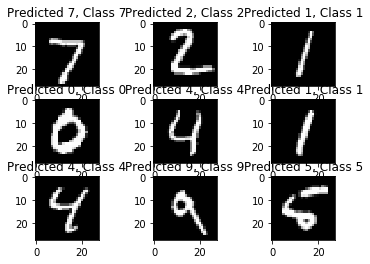

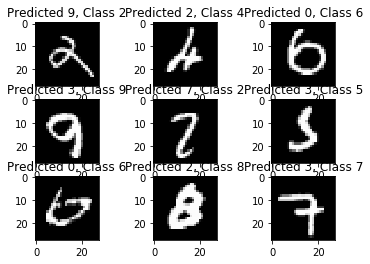

In [79]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
